<a href="https://colab.research.google.com/github/dnaneet/ComputationalMechanicsPlayGround/blob/master/SFD_BMD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shear force and bending moment diagrams using Python SymPy (symbolic computations package)

### Aneet Narendranath, (c) 2020, PhD

![alt text](https://pages.mtu.edu/~dnaneet/2150/imgs/beam1.png)


In [0]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')
init_printing()

In [0]:
# Set R1, R2 to sympy symbols i.e unknowns
R1, R2 = symbols('R1 R2')

# Geometric property of beam (can be calculated using some algorithm)
I = 260.762

# Modulus of Elasticity
E = (29*10**6) #psi
'''
Note : E and I can be made symbols alone. In this case only shear
and bending moment diagrams will be made.
>> E, I = symbols('E, I')
'''
# Length of beam is 9 ft with modulus of elasticity E and moment of inertia I  
b = Beam(9, E, I)


In [0]:
 '''
Uniformly distributed load
first argument: load in lb/ft (or kN/m or N/m)
second argument: start point
third argument: polynomial order.  0 for UDL
fourth argument: end point
 '''


b.apply_load(-3.5, 0, 0, end=2) #UDL
b.apply_load(R1, 2, -1) #SS Reaction at x=2.  Polynomial 1
b.apply_load(R2, 7, -1) #Roller Reaction at x=7.  Polynomial 1
b.apply_load(-3.5, 3, -1) #Point load at x=3. Polynomial 1
b.apply_load(-1.5, 3, 0, end=9) #UDL
b.bc_deflection = [(2, 0), (7, 0)] #boundary condition for deflection.
                                   #Slope is also possible: b.bc_slope = [(...),(...)]

In [10]:
b.solve_for_reaction_loads(R1, R2) #Reactions are solved
print(b.reaction_loads)

{R1: 13.0000000000000, R2: 6.49999999999998}


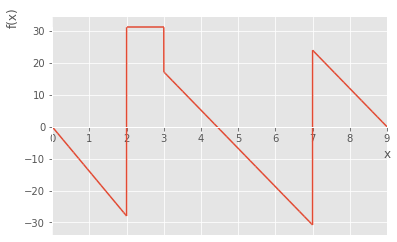

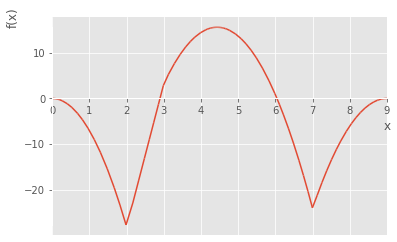

In [11]:
x = symbols('x')
sf = b.shear_force()
bm = b.bending_moment()

plot(sf, (x,0,9))
plot(bm, (x,0,9))